In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
%config InlineBackend.figure_format='retina'

## Midcontinent Rift crystallization dates

In [156]:
MCR_dates = pd.read_csv('../data/MCR_compiled_geochron.csv')
MCR_dates.sort_values('U_Pb_sample_mean',inplace=True)
MCR_dates.reset_index(inplace=True)

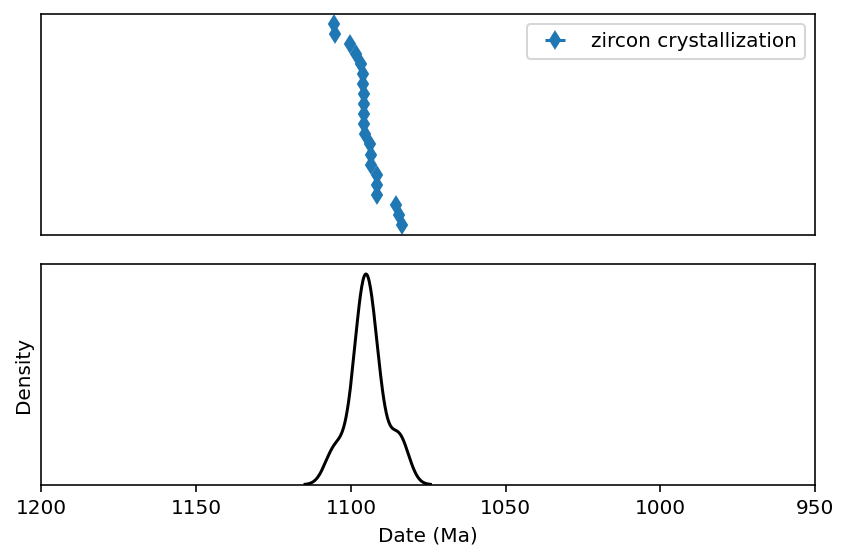

In [157]:
fig = plt.figure(figsize=(6,4))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 2])

fig.add_subplot(spec[0])

plt.errorbar(MCR_dates.U_Pb_sample_mean,
             MCR_dates.index,
             xerr=MCR_dates.U_Pb_sample_2sigma,
             fmt='d',color='C0',label='zircon crystallization')
plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_xticks([])
plt.legend(loc=1)

fig.add_subplot(spec[1])

sns.kdeplot(MCR_dates.U_Pb_sample_mean,bw_adjust=1,color='black')
plt.xlim(1200,950)

plt.gca().set_yticks([])
plt.xlabel('Date (Ma)')

plt.tight_layout()
plt.show()

In [75]:
Blue_Ridge_dates

## Blue Ridge metamorphism dates

Metamorphic dates from the Blue Ridge are compiled using the same headers as the GSC Knowledgebase

In [86]:
Grenville_dates = pd.read_csv('../data/Grenville_meta_dates.csv')
Blue_Ridge_dates = Grenville_dates[Grenville_dates.Geological_Province == 'Blue Ridge']
Blue_Ridge_dates = Blue_Ridge_dates.sort_values('Age')
Blue_Ridge_dates.reset_index(inplace=True)
Blue_Ridge_dates.tail(1)

,index,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,...,Geological_Info,Rock_Type,Rock_Description,References,Compilation_Source,Unnamed: 20,UTM_Zone,UTM_Northing,UTM_Easting,Unnamed: 24
52,15,MR-10-123,1168.0,18.0,NaN,NaN,Metamorphic,76 weighted mean,zircon,SHRIMP,...,NaN,NaN,Yagn amphibole gneiss,NaN,compiled by NSH,Tollo2017a,NaN,NaN,NaN,NaN


In [88]:
Blue_Ridge_dates_z = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'zircon']
Blue_Ridge_dates_t = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'titanite']
Blue_Ridge_dates_g = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'garnet']
Blue_Ridge_dates_m = Blue_Ridge_dates[Blue_Ridge_dates.Age_Material == 'monazite']

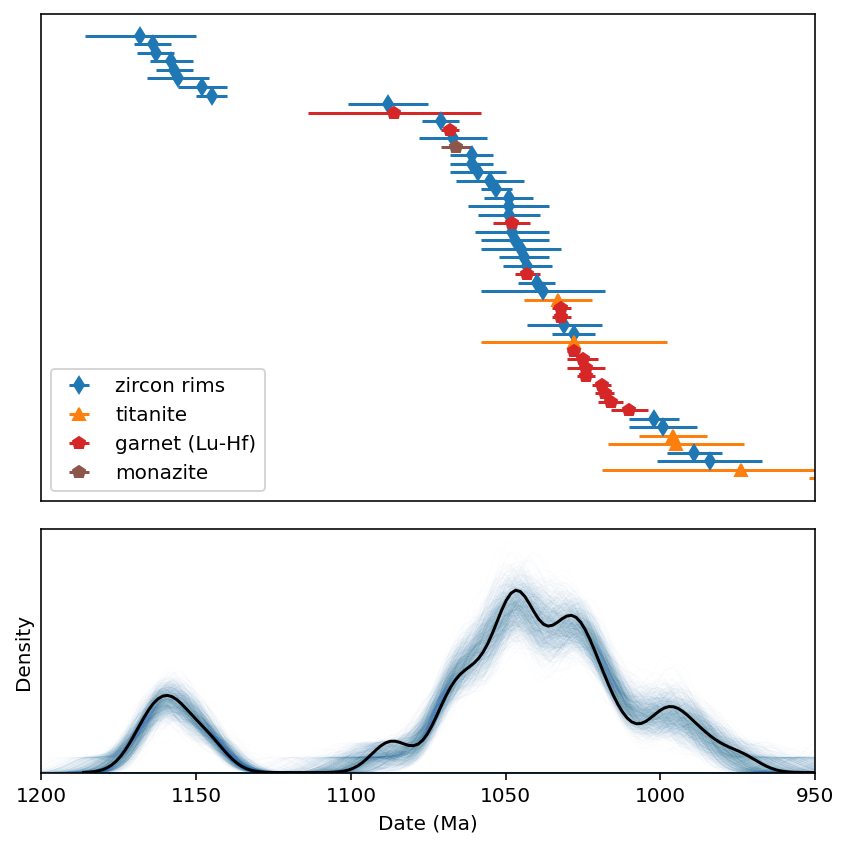

In [92]:
fig = plt.figure(figsize=(6,6))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[4, 2])

fig.add_subplot(spec[0])

plt.errorbar(Blue_Ridge_dates_z.Age,
             Blue_Ridge_dates_z.index,
             xerr=Blue_Ridge_dates_z.Error_Plus,
             fmt='d',color='C0',label='zircon rims')

plt.errorbar(Blue_Ridge_dates_t.Age,
             Blue_Ridge_dates_t.index,
             xerr=Blue_Ridge_dates_t.Error_Plus,
             fmt='^',color='C1',label='titanite')

plt.errorbar(Blue_Ridge_dates_g.Age,
             Blue_Ridge_dates_g.index,
             xerr=Blue_Ridge_dates_g.Error_Plus,
             fmt='p',color='C3',label='garnet (Lu-Hf)')

plt.errorbar(Blue_Ridge_dates_m.Age,
             Blue_Ridge_dates_m.index,
             xerr=Blue_Ridge_dates_m.Error_Plus,
             fmt='p',color='C5',label='monazite')

plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_xticks([])
plt.legend(loc=3)

fig.add_subplot(spec[1])

for i in range(0,1000):

    bootstrapped_dates = []

    for n in Blue_Ridge_dates.index:
        bootstrapped_date = np.random.normal(Blue_Ridge_dates.Age[n], Blue_Ridge_dates.Error_Plus[n]/2, 1)
        bootstrapped_dates.append(bootstrapped_date[0])
        
    sns.kdeplot(bootstrapped_dates,bw_adjust=0.25,alpha=0.001,color='C0',shade=True,linewidth=0.005)
    
sns.kdeplot(Blue_Ridge_dates.Age,bw_adjust=0.25,color='black')

plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.xlabel('Date (Ma)')

plt.tight_layout()
plt.show()

In [97]:
Grenville_dates = pd.read_csv('../data/Grenville_meta_dates.csv')
Grenville_Province_dates = Grenville_dates[Grenville_dates.Geological_Province == 'Grenville Province']
Grenville_Province_dates = Grenville_Province_dates.sort_values('Age')
Grenville_Province_dates.reset_index(inplace=True)
Grenville_Province_dates.tail(1)

,index,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,Age_Technique,...,Geological_Info,Rock_Type,Rock_Description,References,Compilation_Source,Unnamed: 20,UTM_Zone,UTM_Northing,UTM_Easting,Unnamed: 24
37,76,8 metapelite,1610.0,4.0,4.0,U/Pb,Metamorphic,"2 single-grain fractions (lightly abr), slight...",Monazite,TIMS,...,Lake Melville Terrane - Rigolet Thrust,Metamorphic,"metapelite, from central level of thrust: grt-...","Corrigan, D., Rivers, T. and Dunning, G., 2000...",GSCdatabase,Corrigan2000a,NaN,NaN,NaN,NaN


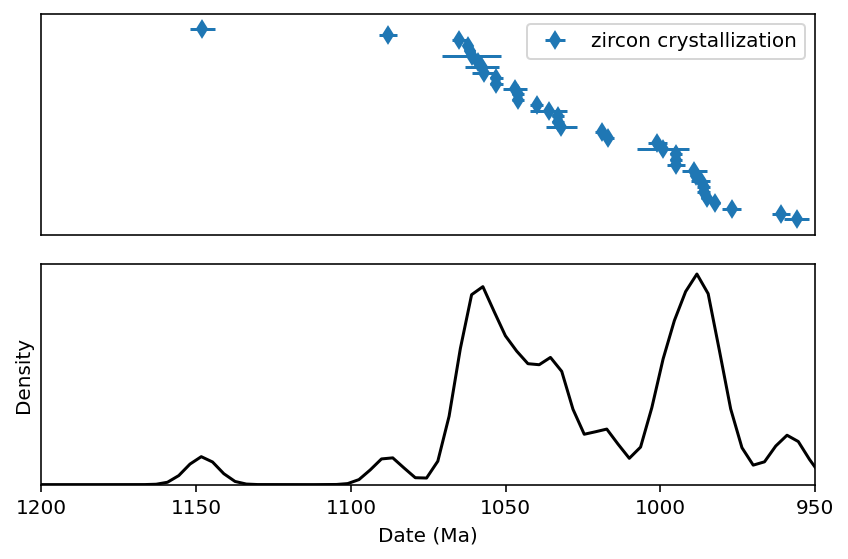

In [98]:
fig = plt.figure(figsize=(6,4))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 2])

fig.add_subplot(spec[0])

plt.errorbar(Grenville_Province_dates.Age,
             Grenville_Province_dates.index,
             xerr=Grenville_Province_dates.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')
plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_xticks([])
plt.legend(loc=1)

fig.add_subplot(spec[1])

sns.kdeplot(Grenville_Province_dates.Age,bw_adjust=0.1,color='black')
plt.xlim(1200,950)

plt.gca().set_yticks([])
plt.xlabel('Date (Ma)')

plt.tight_layout()
plt.show()

## Import the Canadian Geochronology Knowledgebase

The CGKB compilation represents publicly available geochronological information for  Canada. The data is compiled from federal, provincial and territorial government publications and reports, university theses, books and journal articles.

https://www.nrcan.gc.ca/maps-tools-publications/tools/geodetic-reference-systems/canadian-geochronology-knowledgebase/18211

In [31]:
GSC_data = pd.read_csv('../data/GSC_compilation/Geochron_en.txt',sep='\t')
GSC_data.head(1)

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
0,16505,2808,Missi 5,1881.0,8.0,8.0,Pb-evap,Detrital,"Fraction 3, age is 207Pb/206Pb age. U-not meas...",Zircon,...,Churchill/Trans-Hudson Orogen,MB,54.76676,-101.83372,"Flin Flon, E. of Ross Lake","Flin Flon Domain - Little Cliff Member, Missi ...",Sedimentary,pebbly sandstone,"Ansdell, K.M., Kyser, T.K., Stauffer, M.R. and...",2005-02-22 21:47:51


In [33]:
GSC_data_meta = GSC_data[(GSC_data.Age_Interpretation == 'Peak Metamorphic') | (GSC_data.Age_Interpretation == 'Metamorphic')]
GSC_data_ign = GSC_data[(GSC_data.Age_Interpretation == 'Igneous Crystallization')]
GSC_data_meta_Grenville = GSC_data_meta[GSC_data_meta.Geological_Province == 'Grenville Province']
GSC_data_meta_Grenville.head(1)

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
2021,14627,-9328,CG97-301,975.5,5.1,5.1,U/Pb,Metamorphic,Only one titanite analysis,Titanite,...,Grenville Province,NL,51.04865,-56.76933,"Tectonic inlier, N of northern end of Long Ran...",Grenville Inlier withe the Paleozoic platform ...,Plutonic,"Pink- to grey- weathering, medium-grained, rec...","Heaman, L.M., Gower, C.F. and Perrault, S., 20...",2004-01-01 12:00:00


In [70]:
Grenville_monazite = GSC_data_meta[(GSC_data_meta.Geological_Province == 'Grenville Province') & 
                                   (GSC_data_meta.Age_Material == 'Monazite') &  
                                    (GSC_data_meta.Error_Plus != 0) &  
                                    (GSC_data_meta.Error_Plus < 20)]

Grenville_monazite = Grenville_monazite[Grenville_monazite.Age_Note != 'Grey-literature: information and age quality to be verified by user']
Grenville_monazite = Grenville_monazite.sort_values('Age')
Grenville_monazite.reset_index(inplace=True)
Grenville_monazite.to_csv('../data/GSC_compilation/GSC_data_meta_Grenville_monazite.csv')

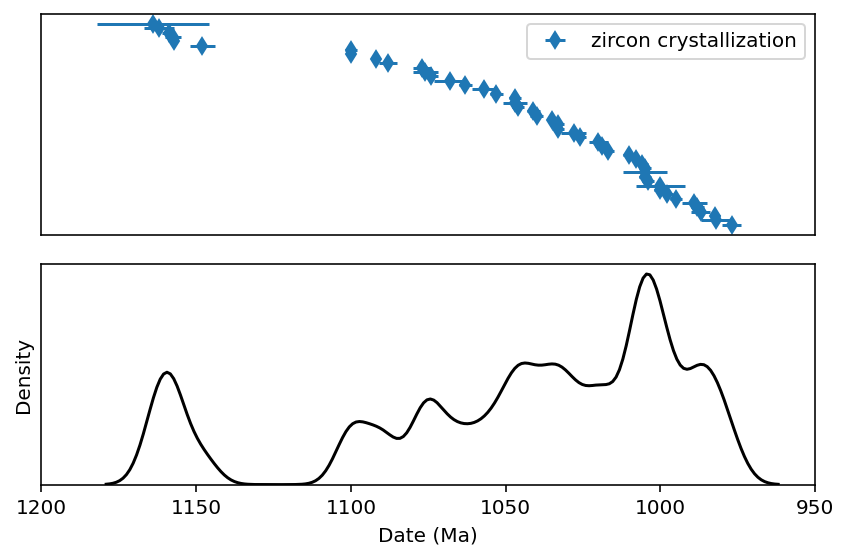

In [68]:
fig = plt.figure(figsize=(6,4))
spec = gridspec.GridSpec(ncols=1, nrows=2,
                         height_ratios=[2, 2])

fig.add_subplot(spec[0])

plt.errorbar(Grenville_monazite.Age,
             Grenville_monazite.index,
             xerr=Grenville_monazite.Error_Plus,
             fmt='d',color='C0',label='zircon crystallization')
plt.xlim(1200,950)
plt.gca().set_yticks([])
plt.gca().set_xticks([])
plt.legend(loc=1)

fig.add_subplot(spec[1])

sns.kdeplot(Grenville_monazite.Age,bw_adjust=0.2,color='black')
plt.xlim(1200,950)

plt.gca().set_yticks([])
plt.xlabel('Date (Ma)')

plt.tight_layout()
plt.show()

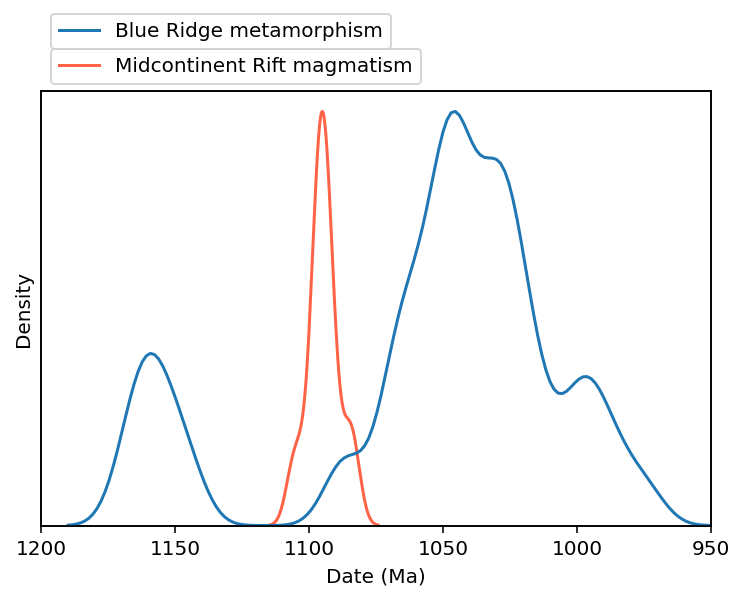

In [166]:
fig, ax = plt.subplots()
sns.kdeplot(MCR_dates.U_Pb_sample_mean,bw_adjust=1,color='tomato',ax=ax,label='Midcontinent Rift magmatism')
ax.set_yticks([])
plt.xlabel('Date (Ma)')
plt.legend(loc='upper left',bbox_to_anchor=[0,1.12])

ax2 = ax.twinx()
sns.kdeplot(Grenville_dates.Date,bw_adjust=0.3,color='C0',ax=ax2,label='Blue Ridge metamorphism')
ax2.set_yticks([])
plt.legend(loc='upper left',bbox_to_anchor=[0,1.2])
plt.ylabel('')
plt.xlabel('')
plt.xlim(1200,950)
plt.show()

In [96]:
bootstrapped_dates

[926.106962182987,
 973.3729260998831,
 975.4714641007572,
 993.3956036296106,
 993.8904457692649,
 995.5387711403699,
 995.6841831134708,
 1006.9443882924945,
 1007.3639609806424,
 1016.6452075455704,
 1017.5118778547967,
 1021.8259597111437,
 1024.2027645729843,
 1027.3640472554428,
 1026.6655915118856,
 1028.6618844882114,
 1022.0879434849563,
 1030.4729450490292,
 1039.4603974141853,
 1033.3223774781602,
 1028.6958990408993,
 1041.7912414045213,
 1017.5924387224934,
 1044.6568250328971,
 1041.5700349369506,
 1039.7397267880758,
 1039.263535074676,
 1057.711418633382,
 1044.621338905394,
 1052.5530385306856,
 1054.5817162919006,
 1043.609313907968,
 1047.5593556704298,
 1044.6608096117266,
 1052.7113211722512,
 1047.1476584955965,
 1057.5595324125595,
 1063.6081001291047,
 1062.873196434915,
 1069.319597352759,
 1063.9279142575917,
 1071.2894571575941,
 1074.1791785136443,
 1077.6487123977597,
 1090.258060135643,
 1145.3143978014625,
 1149.5589279163507,
 1155.614688948012,
 1155.82

In [97]:
Grenville_dates.Date

0      906
1      974
2      984
3      989
4      995
5      996
6      999
7     1002
8     1010
9     1016
10    1018
11    1019
12    1024
13    1024
14    1025
15    1028
16    1028
17    1028
18    1031
19    1032
20    1032
21    1033
22    1038
23    1040
24    1043
25    1043
26    1044
27    1045
28    1047
29    1048
30    1048
31    1049
32    1049
33    1049
34    1053
35    1055
36    1059
37    1061
38    1061
39    1066
40    1067
41    1068
42    1071
43    1086
44    1088
45    1145
46    1148
47    1156
48    1157
49    1158
50    1163
51    1164
52    1168
Name: Date, dtype: int64

In [11]:
def weighted_mean(dates,sigma):
    
    """
    calculated a weighted mean from dates and uncertainities
    
    input parameters
    ----------------
    dates: date of individual grains
    sigma: 1 sigma uncertainty associated with dates
    
    returns
    ----------------
    weighted_mean, 2 sigma uncertainty
    
    """
    
    inverse_variance=[]
    alpha=[]
    weighted_mean_calc=[]
    
    for n in range(0,len(dates)):
        value = 1/sigma[n]**2
        inverse_variance.append(value)
    inverse_variance_sum = np.sum(inverse_variance)
    
    for n in range(0,len(dates)):
        value = (1/sigma[n]**2)/inverse_variance_sum
        alpha.append(value)
        
    #calculate the weights for each date
    for n in range(0,len(dates)):
        value = alpha[n]*dates[n]
        weighted_mean_calc.append(value)
    
    #take the sum of the weights multiplied by the dates to get the weighted
    #mean (equation 64 of McLean et al., 2011)
    weighted_mean = np.sum(weighted_mean_calc)
    
    #the variance of the weighted mean is simply the inverse of the sum of
    #the inverse variances of each date (equation 66 of McLean et al., 2011)
    variance = 1/inverse_variance_sum
    
    weighted_mean_sigma = np.sqrt(variance)
    
    n = len(dates)
    
    print('The weighted mean is:')

    print(weighted_mean)

    print('With a 2sigma error of:')

    print(2*weighted_mean_sigma)
    
    print('N=' )
    print(n)
    
    return weighted_mean, 2*weighted_mean_sigma

Data from **Constraints on the timing and duration of orogenic events by combined Lu–Hf and Sm–Nd geochronology: An example from the Grenville orogeny**

Errors are 1$\sigma$

In [30]:
J2018_z = pd.read_csv('../data/Johnson2018/Johnson2018_zircon.csv')
J2018_z_rim = J2018_z[J2018_z.rim_core=='rim']
J2018_z_rim_BV10 = J2018_z_rim[J2018_z_rim['sample_ID']=='BV10']
J2018_z_rim_S09 = J2018_z_rim[J2018_z_rim['sample_ID']=='S09']
J2018_z_rim_S10 = J2018_z_rim[J2018_z_rim['sample_ID']=='S10']
J2018_z_rim_ST10 = J2018_z_rim[J2018_z_rim['sample_ID']=='ST10']

In [23]:
J2018_z_rim_BV10

,sample_ID,Unnamed: 1,Unnamed: 2,204Pb_206Pb,207Pb_206Pb,206Pb_percent,U_ppm,Th_U,206Pb_238U_date,206Pb_238U_date_err,207Pb_206Pb_date,207Pb_206Pb_date_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,rho,rim_core
101,BV10,1.2*,NaN,0.000030,0.0723,0.052,660,0.15,1004,11,982,9,1.669,1.3,0.1685,1.2,0.942,rim
104,BV10,4.1*,NaN,0.000042,0.0727,0.072,350,0.70,1038,40,989,36,1.737,4.6,0.1747,4.2,0.920,rim
105,BV10,5.1*,NaN,0.000024,0.0723,0.042,550,0.27,1010,21,985,29,1.683,2.6,0.1697,2.2,0.837,rim
109,BV10,9.1*,NaN,0.000029,0.0728,0.050,600,0.22,1043,49,996,73,1.752,6.2,0.1756,5.1,0.815,rim
110,BV10,10.1*,NaN,-0.000024,0.0728,-0.042,510,0.49,1003,12,1018,42,1.699,2.4,0.1684,1.2,0.513,rim
113,BV10,12.2*,NaN,0.000090,0.0738,0.150,790,0.15,954,11,1000,16,1.595,1.4,0.1595,1.2,0.828,rim
117,BV10,16.1*,NaN,-0.000019,0.0718,-0.032,490,1.25,1010,19,987,9,1.684,2.1,0.1696,2.0,0.975,rim
129,BV10,27.2*,NaN,0.000024,0.0730,0.041,520,0.08,974,17,1006,18,1.636,2.1,0.1632,1.9,0.907,rim


In [24]:
weighted_mean(J2018_z_rim_BV10['207Pb_206Pb_date'].tolist(),J2018_z_rim_BV10['207Pb_206Pb_date_err'].tolist())

The weighted mean is:
988.9222078346816
With a 2sigma error of:
10.783396557500131
N=
8


(988.9222078346816, 10.783396557500131)

In [25]:
J2018_z_rim_S09

,sample_ID,Unnamed: 1,Unnamed: 2,204Pb_206Pb,207Pb_206Pb,206Pb_percent,U_ppm,Th_U,206Pb_238U_date,206Pb_238U_date_err,207Pb_206Pb_date,207Pb_206Pb_date_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,rho,rim_core
1,S09,1,2.1*,0.000028,0.0743,0.048,350,0.98,1011,22,1038,29,1.730,2.7,0.1699,2.3,0.853,rim
4,S09,1,4.2*,0.000020,0.0735,0.035,2800,0.02,1086,20,1019,27,1.852,2.4,0.1836,2.0,0.825,rim
5,S09,1,4.3*,0.000010,0.0712,0.018,6200,0.03,843,16,958,10,1.368,2.1,0.1398,2.0,0.969,rim
6,S09,1,5.1*,0.000095,0.0759,0.160,240,1.10,1022,22,1055,34,1.764,2.9,0.1717,2.3,0.805,rim
8,S09,1,6.2*,0.000010,0.0730,0.017,2700,0.02,1015,19,1011,22,1.714,2.3,0.1705,2.0,0.878,rim
9,S09,1,7.1*,-0.000008,0.0742,-0.013,300,0.71,1020,21,1049,30,1.755,2.7,0.1714,2.2,0.838,rim
10,S09,1,7.2*,0.000044,0.0719,0.075,380,0.67,1027,20,964,47,1.697,3.1,0.1728,2.1,0.675,rim
12,S09,1,8.2*,0.000002,0.0742,0.004,4300,0.02,954,19,1046,11,1.630,2.2,0.1594,2.1,0.968,rim
19,S09,1,14.2*,0.000000,0.0721,0.000,580,0.32,997,19,987,22,1.662,2.3,0.1673,2.1,0.889,rim
25,S09,1,19.2*,0.000029,0.0739,0.049,470,0.52,1025,20,1027,24,1.745,2.4,0.1723,2.1,0.867,rim


In [26]:
weighted_mean(J2018_z_rim_S09['207Pb_206Pb_date'].tolist(),J2018_z_rim_S09['207Pb_206Pb_date_err'].tolist())

The weighted mean is:
1005.4899472496404
With a 2sigma error of:
11.719684826117621
N=
10


(1005.4899472496404, 11.719684826117621)

In [28]:
J2018_z_rim_S10

,sample_ID,Unnamed: 1,Unnamed: 2,204Pb_206Pb,207Pb_206Pb,206Pb_percent,U_ppm,Th_U,206Pb_238U_date,206Pb_238U_date_err,207Pb_206Pb_date,207Pb_206Pb_date_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,rho,rim_core
29,S10,1,1.3*,0.001323,0.0874,2.300,450,0.45,1053,17,881,120,1.673,6.3,0.1774,1.7,0.277,rim
32,S10,1,3.2*,0.000235,0.0787,0.400,730,0.24,1021,19,1078,30,1.782,2.5,0.1715,2.1,0.808,rim
36,S10,1,6.2*,0.000210,0.0755,0.360,420,0.47,1030,18,1000,57,1.731,3.4,0.1732,1.9,0.569,rim
38,S10,1,7.2*,0.000256,0.0757,0.440,340,0.26,1014,18,987,50,1.693,3.1,0.1704,1.9,0.621,rim
42,S10,1,10.2*,0.000305,0.0757,0.520,1100,0.15,1035,16,967,65,1.713,3.6,0.1742,1.7,0.466,rim
44,S10,1,11.2*,0.000021,0.0744,0.036,1700,0.13,1041,20,1045,31,1.791,2.6,0.1752,2.0,0.795,rim
46,S10,1,12.2*,0.000119,0.0738,0.200,1200,0.15,1035,32,988,53,1.730,4.2,0.1741,3.3,0.788,rim
48,S10,1,14.1*,0.000047,0.0705,0.081,550,0.48,1079,18,924,71,1.755,3.9,0.1823,1.8,0.467,rim
57,S10,1,22.2*,0.000092,0.0736,0.160,400,0.65,1037,18,994,27,1.740,2.3,0.1746,1.9,0.817,rim
58,S10,1,24.1*,0.006197,0.1634,10.500,500,0.30,986,21,1075,290,1.714,14.7,0.1652,2.3,0.154,rim


In [29]:
weighted_mean(J2018_z_rim_S10['207Pb_206Pb_date'].tolist(),J2018_z_rim_S10['207Pb_206Pb_date_err'].tolist())

The weighted mean is:
1010.6135903334875
With a 2sigma error of:
24.876771475282762
N=
13


(1010.6135903334875, 24.876771475282762)

In [31]:
J2018_z_rim_ST10

,sample_ID,Unnamed: 1,Unnamed: 2,204Pb_206Pb,207Pb_206Pb,206Pb_percent,U_ppm,Th_U,206Pb_238U_date,206Pb_238U_date_err,207Pb_206Pb_date,207Pb_206Pb_date_err,207Pb_235U,207Pb_235U_err,206Pb_238U,206Pb_238U_err,rho,rim_core
68,ST10,1,2.1*,0.000223,0.0751,0.41,200,0.73,1011,45,983,44,1.684,5.2,0.1699,4.8,0.911,rim
70,ST10,1,3.2*,0.000010,0.0764,0.02,2400,0.01,1153,29,1101,8,2.058,2.8,0.1958,2.8,0.990,rim
82,ST10,1,14.2*,0.000044,0.0779,0.08,1200,0.03,1106,21,1129,10,1.994,2.2,0.1871,2.1,0.971,rim
87,ST10,1,19.1*,0.000215,0.0769,0.39,360,0.57,1043,41,1037,44,1.788,4.8,0.1757,4.2,0.891,rim
90,ST10,1,22.1*,0.000287,0.0780,0.53,270,0.71,1052,39,1040,66,1.808,5.2,0.1773,4.0,0.776,rim
93,ST10,1,25.1*,0.000466,0.0780,0.85,260,0.64,1035,35,966,51,1.713,4.4,0.1742,3.6,0.826,rim
97,ST10,1,28.2*,0.000360,0.0755,0.66,460,0.54,1096,46,938,33,1.797,4.8,0.1854,4.6,0.942,rim


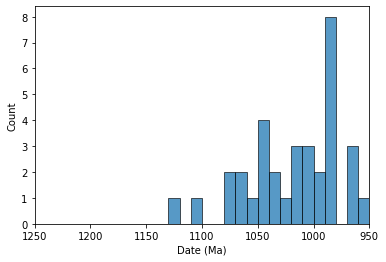

In [67]:
sns.histplot(J2018_z_rim['207Pb_206Pb_date'],bins=np.arange(800,1300,10))
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

In [43]:
file_150 = '../data/Williams2019/16TG150-Elephant-Rock-Monazite-Composition-reformat.xlsx'
file_151 = '../data/Williams2019/16Tg151-Treadway-Mountain-Monzite-Composition-Reformat.xlsx'
file_153 = '../data/Williams2019/16TG153-Dixon-schist-Monazite Composition-reformat.xlsx'
file_154 = '../data/Williams2019/16TG154-Swede-Pond-Monazite-Composition-reformat.xlsx'

M2019_150 = pd.read_excel(file_150,header=2,nrows=24)
M2019_151 = pd.read_excel(file_151,header=2,nrows=37)
M2019_153 = pd.read_excel(file_153,header=2,nrows=14)
M2019_154 = pd.read_excel(file_154,header=3,nrows=37)

M2019_dates = M2019_150.Date.tolist() + M2019_151.Date.tolist() + M2019_153.Date.tolist() + M2019_154.Date.tolist()

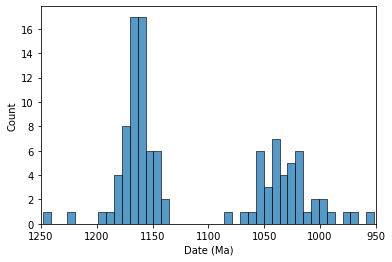

In [55]:
sns.histplot(M2019_dates,bins=50)
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

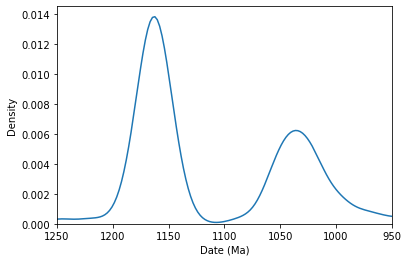

In [54]:
sns.kdeplot(M2019_dates,bw_adjust=0.4)
plt.xlim(1250,950)
plt.xlabel('Date (Ma)')
plt.show()

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
0,16505,2808,Missi 5,1881.0,8.0,8.0,Pb-evap,Detrital,"Fraction 3, age is 207Pb/206Pb age. U-not meas...",Zircon,...,Churchill/Trans-Hudson Orogen,MB,54.76676,-101.83372,"Flin Flon, E. of Ross Lake","Flin Flon Domain - Little Cliff Member, Missi ...",Sedimentary,pebbly sandstone,"Ansdell, K.M., Kyser, T.K., Stauffer, M.R. and...",2005-02-22 21:47:51
1,16506,2808,Missi 5,2529.0,20.0,20.0,Pb-evap,Detrital,"Fraction 4, age is 207Pb/206Pb age. U-not meas...",Zircon,...,Churchill/Trans-Hudson Orogen,MB,54.76676,-101.83372,"Flin Flon, E. of Ross Lake","Flin Flon Domain - Little Cliff Member, Missi ...",Sedimentary,pebbly sandstone,"Ansdell, K.M., Kyser, T.K., Stauffer, M.R. and...",2005-02-22 21:47:55
2,16507,2808,Missi 5,1847.0,2.0,2.0,U/Pb,Detrital,"Fraction 5A, 0.2% discordant; age is 207Pb/206...",Zircon,...,Churchill/Trans-Hudson Orogen,MB,54.76676,-101.83372,"Flin Flon, E. of Ross Lake","Flin Flon Domain - Little Cliff Member, Missi ...",Sedimentary,pebbly sandstone,"Ansdell, K.M., Kyser, T.K., Stauffer, M.R. and...",2005-02-22 21:48:00
3,16508,2808,Missi 5,1851.0,2.0,2.0,U/Pb,Detrital,"Fraction 5B, 0.7% discordant; age is 207Pb/206...",Zircon,...,Churchill/Trans-Hudson Orogen,MB,54.76676,-101.83372,"Flin Flon, E. of Ross Lake","Flin Flon Domain - Little Cliff Member, Missi ...",Sedimentary,pebbly sandstone,"Ansdell, K.M., Kyser, T.K., Stauffer, M.R. and...",2005-02-22 21:28:48
4,16509,-10395,Missi 6,1858.0,8.0,8.0,Pb-evap,Detrital,"Fraction 1, age is 207Pb/206Pb age. U-not meas...",Zircon,...,Churchill/Trans-Hudson Orogen,MB,54.78718,-101.86150,"Flin Flon, approx. 1 km N of Ross Lake. Coordi...",Flin Flon Domain - Missi Formation,Sedimentary,sandstone,"Ansdell, K.M., Kyser, T.K., Stauffer, M.R. and...",2005-02-22 21:46:17


In [7]:
GSC_data.Age_Interpretation.unique()

array(['Detrital', 'Peak Metamorphic', 'Igneous Crystallization',
       'Cooling', 'Mineralization', 'Model Age', 'Metamorphic', 'Reset',
       'No Age', 'Inheritance', 'Thermal Disturbance', 'Deposition',
       'Metasomatic', 'Alteration', 'Xenocryst', nan, 'Recrystallization',
       'Protolith age', 'Uncertain', 'Hydrothermal', 'Pb Loss',
       'Lower Intercept', 'Diagenesis', 'Retrogression',
       'Neocrystallization'], dtype=object)

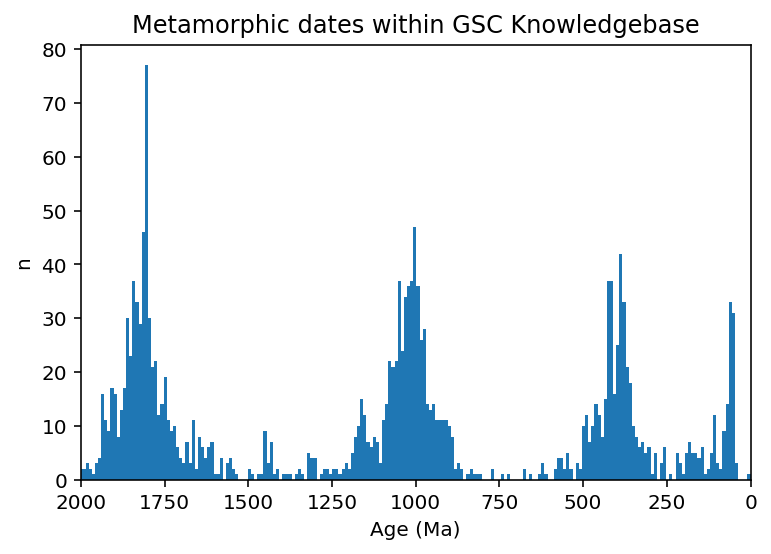

In [9]:
plt.hist(GSC_data_meta.Age,bins=400)
plt.xlim(2000,0)
plt.title('Metamorphic dates within GSC Knowledgebase')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.show()

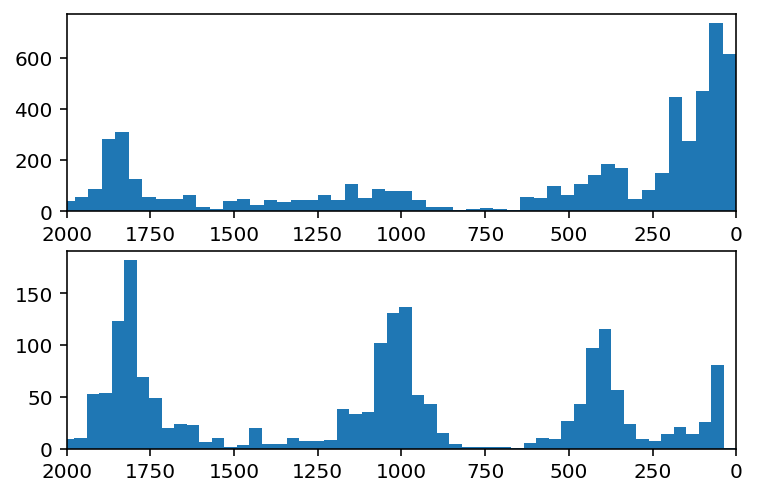

In [10]:
plt.subplot(2,1,1)
plt.hist(GSC_data_ign.Age,bins=100)
plt.xlim(2000,0)
plt.xlabel('Age (Ma)')
plt.subplot(2,1,2)
plt.hist(GSC_data_meta.Age,bins=100)
plt.xlim(2000,0)
plt.show()

,Age_No,Lab_No,Sample_No,Age,Error_Plus,Error_Minus,Age_Method,Age_Interpretation,Age_Note,Age_Material,...,Geological_Province,Province,Latitude,Longitude,Location,Geological_Info,Rock_Type,Rock_Description,References,LastUpdated
2021,14627,-9328,CG97-301,975.5,5.1,5.1,U/Pb,Metamorphic,Only one titanite analysis,Titanite,...,Grenville Province,NL,51.04865,-56.76933,"Tectonic inlier, N of northern end of Long Ran...",Grenville Inlier withe the Paleozoic platform ...,Plutonic,"Pink- to grey- weathering, medium-grained, rec...","Heaman, L.M., Gower, C.F. and Perrault, S., 20...",2004-01-01 12:00:00


Grenville Province data from GSC compilation



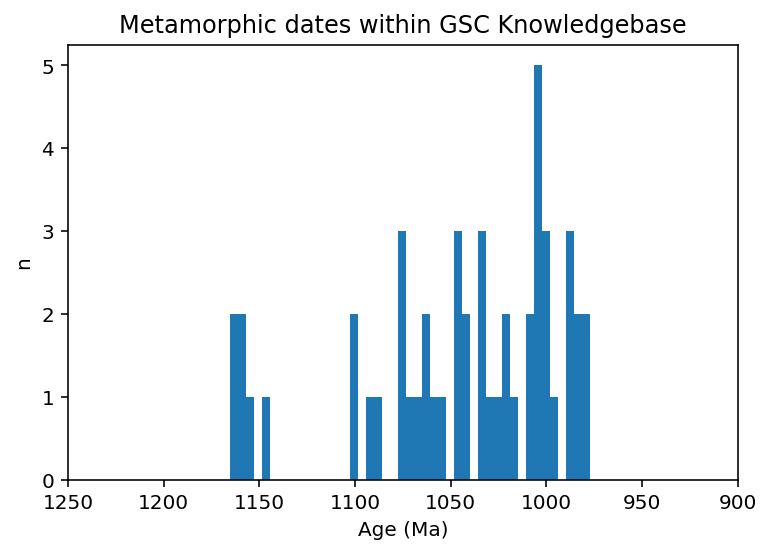

In [25]:
plt.hist(GSC_data_meta_Grenville_monazite.Age,bins=400)
plt.xlim(1250,900)
plt.title('Metamorphic dates within GSC Knowledgebase')
plt.xlabel('Age (Ma)')
plt.ylabel('n')
plt.show()

In [ ]:
12